# Inspired by
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [3]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np 

cat_df = pd.read_csv('./cat_events.csv')
# cat_df.head()

# extract just the hour
cat_df['hr_of_day'] = cat_df['created_local_hr'].str[11:13].astype(int)
cat_df['day_of_week'] = pd.to_datetime(cat_df['created_local_hr']).dt.dayofweek.astype(int)
cat_df.drop('created_local_hr', axis=1, inplace=True)
cat_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cat_df['is_raining'] = False
# DataFrame.where replace values where the condition is *False*. Read this as "when outside_humidity < 70 is false" then set raining to True
cat_df['is_raining'].where(cat_df['outside_humidity'] < 90.0, True, inplace=True)

# Drop outside_humidity now we have is_raining
cat_df.drop('outside_humidity', axis=1, inplace=True)

# Add a simple classification - is-nicho
cat_df['is_nicho'] = 'Yes'
cat_df['is_nicho'].where(cat_df['cat_location'] == 'nicholas', 'No', inplace=True)

cat_df.head()

cat_location  indoor_temp  outside_temp  hr_of_day  day_of_week  is_raining  \
0        study         24.0          18.0          4            5       False   
1       dining         24.0          18.0          5            5       False   
2      outside         24.0          17.0          6            5       False   
3      bedroom         23.0          18.0          7            5       False   
4      bedroom         23.0          20.0          8            5       False   

  is_nicho  
0       No  
1       No  
2       No  
3       No  
4       No

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=cat_df[['indoor_temp', 'outside_temp', 'hr_of_day', 'day_of_week', 'is_raining']]  # Features
y=cat_df['cat_location']  # Labels

# X=cat_df[[ 'hr_of_day']]  # Features
# y=cat_df['is_nicho']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5603112840466926


In [22]:
# Try a prediction
data = {'indoor_temp':[24.0], 
        'outside_temp':[18.0], 
        'hr_of_day':[5], 
        'day_of_week':[5], 
        'is_raining':[False],}
pdf = pd.DataFrame(data)

clf.predict(pdf)[0]


'dining'

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

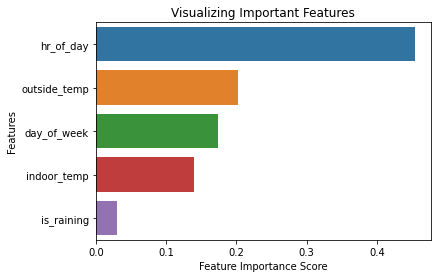

In [8]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [114]:
# Optional - drop less important features and see if it's any more accurate

# Import train_test_split function
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Removed feature "is_raining"

X=cat_df[['indoor_temp', 'outside_temp', 'hr_of_day', 'day_of_week']]  # Features
y=cat_df['cat_location']  # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test



#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5433333333333333


In [9]:
# Display tree
from sklearn.tree import export_graphviz

# Extract single tree
estimator = clf.estimators_[2]

# target_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', ]
target_names = clf.classes_

# Export as dot file
export_graphviz(estimator, out_file='cat_predictor_full.dot', 
                feature_names = list(X.columns),
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call

# Graphviz command line tool to create image
call(['dot', '-Tpng', 'cat_predictor_full.dot', '-o', 'cat_predictor_full.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'cat_predictor_full.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.206988 to fit


In [11]:
# Save the model
pickle.dump(clf, open('cat_predictor_full_clf.pkl', 'wb'))